# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

import warnings
plt.rcParams['figure.figsize']=[10,8]
sns.set(style='white')
sns.set_palette('Set2')

warnings.filterwarnings('ignore')

In [2]:
# matplotlib 한글 설정
import platform
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/NanumSquare.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### 2) 데이터 로딩

In [3]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

- 범주형 X - > 범주형 Y

#### 1) Gender --> Attrition

In [4]:
feature = 'Gender'
target = 'Attrition'

In [5]:
data[feature].isna().sum()

0

In [6]:
data[target].isna().sum()

0

① 교차표(pd.crosstab())

In [7]:
cross = pd.crosstab(data[feature], data[target], normalize='index')
cross

Attrition,0,1
Gender,,
Female,0.859184,0.140816
Male,0.827632,0.172368


② 시각화( Stacked Bar, Mosaic)

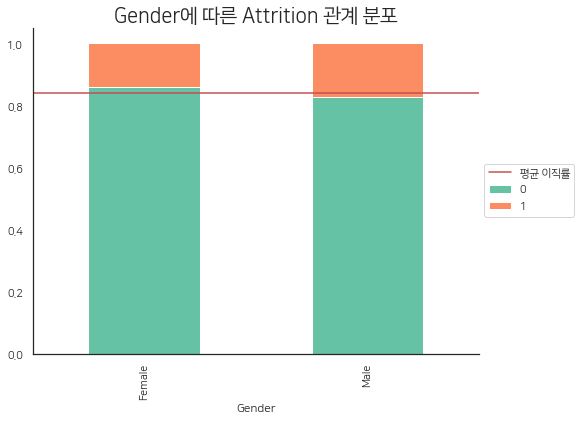

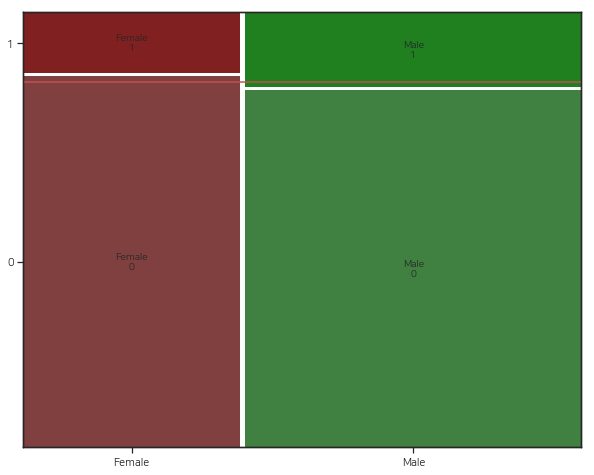

In [8]:
cross.plot.bar(stacked=True, figsize=(8,6))
plt.axhline(1-data[target].mean(), color = 'r')
plt.legend(labels= ["평균 이직률","0","1"],bbox_to_anchor=(1, 0.6))
sns.despine()
plt.title("Gender에 따른 Attrition 관계 분포", size = 20)
plt.show()

mosaic(data.sort_values([feature, target]),[feature, target], gap = 0.01)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - Stacked Bar, Mosaic로 시각화해본 결과, 
    - 각 성별에서 평균 이직률과 차이가 크지않다.

③ 가설검정(카이제곱검정)

In [9]:
# 카이제곱검정
table = pd.crosstab(data[target], data[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - 성별과 이직여부는 관련이 없다고 유추할 수 있다.

>- 가설검정 결과
    - p-value가 0.05보다 크기 때문에 관련이 없다고 판단할 수 있다.
    
>- 앞서 시각화한 결과와 가설검정 결과를 같이 본 결과, 
  <br></br>대립가설인 "성별과 이직여부가 관련있다"는 가설은 기각하고 귀무가설을 채택할 수 있다.
>- 결론 : 관계가 없다.

#### 2) MaritalStatus --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 3) JobSatisfaction --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 4) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 5) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [10]:
feature = 'Age'
target = 'Attrition'

In [11]:
data[feature].isna().sum()

0

In [12]:
data[target].isna().sum()

0

In [13]:
data[feature].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

① 그래프 : histogram, densityplot

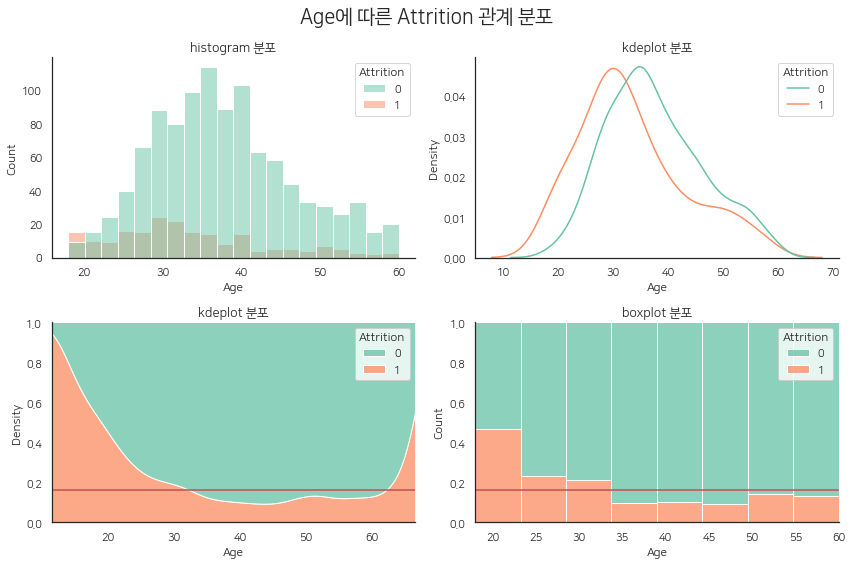

In [14]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 20
sns.histplot(x= data[feature], hue = data[target], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
sns.kdeplot(x= data[feature], hue = data[target], common_norm=False)
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(x = data[feature], hue = data[target], multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
bins = 8
sns.histplot(x = data[feature], hue = data[target], multiple = 'fill', bins = bins)
plt.axhline(data[target].mean(), color = 'r')
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{feature}에 따른 {target} 관계 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 그래프의 분포를 보면
    - 이직여부에 따른 밀도함수 그래프가 서로 겹치지 않는 것을 보아 나이와 이직여부가 관계가 있다고 유추할 수 있다.
    - 18세 ~ 35세까지는 이직률이 높고, 35세 ~ 60세까지는 이직률이 낮은 것으로 판단된다.

② 수치화 : 로지스틱회귀

In [15]:
# 로지스틱회귀
import statsmodels.api as sm  # 로지스틱 회귀 불러오는 패키지

model = sm.Logit(data[target], data[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - 18세 ~  35세까지는 청년층, 35세 ~ 60세까지는 중장년층으로 범주를 나눠서 분석이 필요해보인다.
    - 청년층은 이제 막 회사 생활을 접하면서 여러가지 시도를 많이하는 경향이 있어서 이직을 많이하는 시기이고, 중장년층은 회사 생활 경험도 어느정도 쌓이면서 본인에게 맞는 회사를 이미 찾아가 정착하는 시기라고 생각이 된다.

> - 로지스틱회귀 결과
    - p-value가 0.05보다 작기 때문에 관련이 있다고 판단할 수 있다.

>- 앞서 시각화한 결과와 로지스틱회귀 결과를 같이 본 결과, 
    <br></br>귀무가설을 기각하고, 대립가설인 "나이와 이직여부가 관련있다"는 가설은 채택할 수 있다.
> - 결론 : 관계가 있다! (강한관계이다!!)

#### 2) DistanceFromHome --> Attrtion


In [16]:
feature = 'DistanceFromHome'
target = 'Attrition'

In [17]:
# 집-직장 거리(DistanceFromHome) 변수 결측치 존재
data[feature].isna().sum()
# 결측치 존재하는 부분 제거
data = data.loc[data[feature].notnull()]

In [18]:
data[target].isna().sum()

0

In [19]:
data[feature].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

① 그래프 : histogram, densityplot

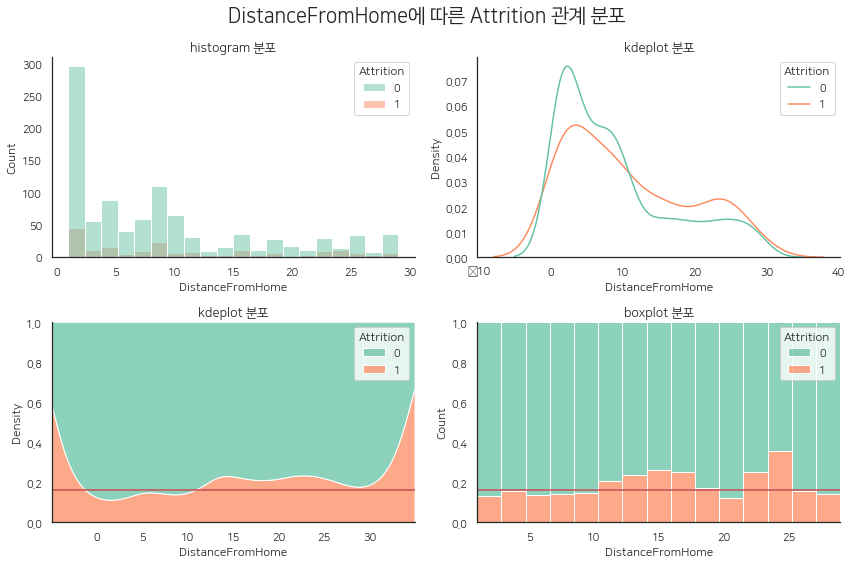

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 20
sns.histplot(x= data[feature], hue = data[target], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
sns.kdeplot(x= data[feature], hue = data[target], common_norm=False)
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(x = data[feature], hue = data[target], multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
bins = 15
sns.histplot(x = data[feature], hue = data[target], multiple = 'fill', bins = bins)
plt.axhline(data[target].mean(), color = 'r')
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{feature}에 따른 {target} 관계 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 그래프의 분포를 보면
    - 이직여부에 따른 밀도함수 그래프가 서로 많이 겹치지 않는 것을 보아 집과 직장과의 거리와 이직여부가 약간 관계가 있다고 유추할 수 있다.
    - 특히 1마일에 거주하는 직원이 많다.
    - 10 ~ 18마일 & 22 ~ 26마일에서 이직률이 많다.

② 수치화 : 로지스틱회귀

In [21]:
# 로지스틱회귀
import statsmodels.api as sm  # 로지스틱 회귀 불러오는 패키지

model = sm.Logit(data[target], data[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 결과
    - 10 ~ 18마일 & 22 ~ 26마일에서 이직률이 많은데, 왜 이러한 현상이 나타나는지 파악이 필요하다.
    - 1마일에 거주하는 직원은 회사 내 기숙사가 존재해서 특히 많을 수도 있을 것이라고 판단된다.
    
> - 로지스틱 회귀 결과
    - p-value가 0.05보다 작기 때문에 관련이 있다고 판단할 수 있다.
    
>- 앞서 시각화한 결과와 로지스틱회귀 결과를 같이 본 결과, 
    <br></br>귀무가설을 기각하고, 대립가설인 "집-직장거리와 이직여부가 관련있다"는 가설은 채택할 수 있다.
> - 결론 : 관계가 있다. (약한 관계 추정)

#### 3) MonthlyIncome --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 4) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 5) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

## 4.관계 정리

### 1) 강한관계의 변수

- Age

### 2) 중간관계의 변수

- DistanceFromHome

### 3) (거의)관계 없음

- Sex

## 5. 추가 분석

### 1) 분석1

- Age를 구간을 나눠서 분석(세대별)
- 18세 ~  35세 : 청년층
- 35세 ~ 60세 : 중장년층

In [22]:
bins = [18,35,np.inf]
labels = ['청년층', '중장년층']
data["Age_Group"] = pd.cut(data["Age"], bins = bins, labels = labels, right = False)
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,Age_Group
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4,청년층
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3,중장년층
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4,중장년층
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3,중장년층
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3,청년층


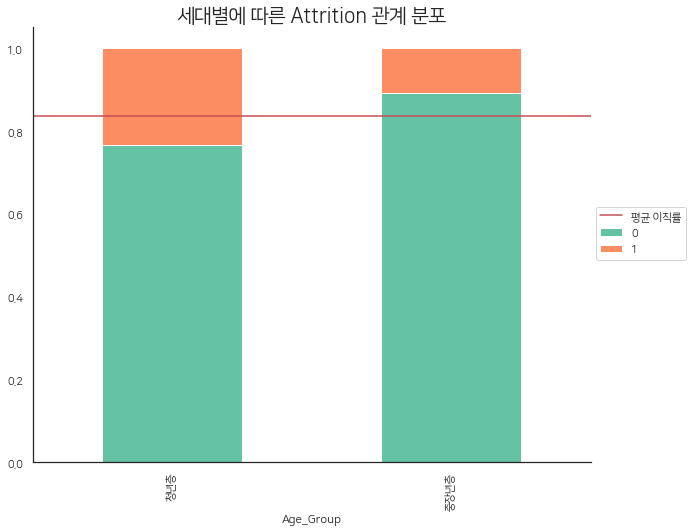

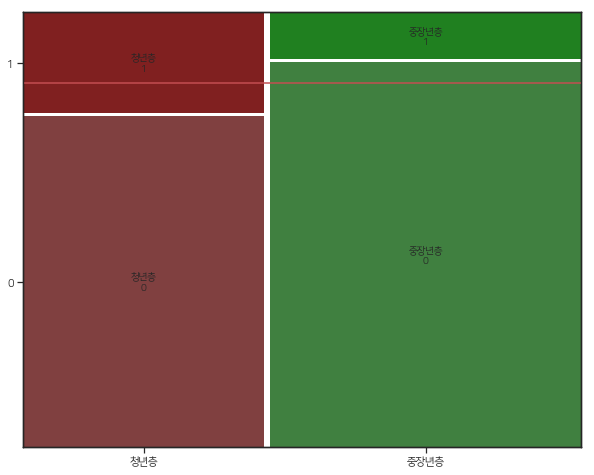

카이제곱통계량 32.99056052920783
p-value 9.260740889148545e-09


In [23]:
temp = pd.crosstab(data["Age_Group"], data["Attrition"], normalize= 'index')
temp.plot.bar(stacked = True)
plt.axhline(1-data["Attrition"].mean(), color = 'r')
plt.legend(labels= ["평균 이직률","0","1"],bbox_to_anchor=(1, 0.6))
sns.despine()
plt.title("세대별에 따른 Attrition 관계 분포", size = 20)
plt.show()

mosaic(data.sort_values(["Age_Group", "Attrition"]),["Age_Group", "Attrition"], gap = 0.01)
plt.axhline(1-data["Attrition"].mean(), color = 'r')
plt.show()

table = pd.crosstab(data["Attrition"], data["Age_Group"])
result = spst.chi2_contingency(table)
print("카이제곱통계량", result[0])
print('p-value', result[1])

- 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 결과
    - 각 나이대층과 평균 이직률과 차이가 있는 것으로 파악된다.
    
> - 가설검정 결과
    - p-value가 0.05보다 작으므로 세대별과 이직 여부가 관련이 있다고 판단된다.

> - 앞서 시각화한 결과와 로지스틱회귀 결과를 같이 본 결과,
귀무가설을 기각하고, 대립가설인 "세대별과 이직여부가 관련있다"는 가설은 채택할 수 있다.
> - 결론 : 관계가 있다. (강한 관계 추정)

### 2) 분석2

### 3) 분석3

### 4) 분석4